# Calculating features

In [2]:
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input

import numpy as np
import pandas as pd
from os.path import join
import os

Using TensorFlow backend.


In [3]:
regions = ['borde_rural', 'borde_soacha', 'mixco_1_and_ebenezer', 'mixco_3']

In [4]:
region = 'curated'
train_dir = join('..', '..', 'data', region, 'roofs_train')
test_dir = join('..', '..', 'data', region, 'roofs_test')
materials = {'concrete_cement':0, 'healthy_metal':1, 'incomplete':2, 'irregular_metal':3, 'other':4}

Use a pretrained network to compute features from the images, which are later classified. Import the model from the Kerase library and remove the top layer by setting `include_top=False`. The last layer is pooled such that we get outputs of size 1x2048 instead of 7x7x2048. The pooling method `'max'` is chosen empirically.

In [5]:
model = ResNet50(weights='imagenet', include_top=False, pooling='max')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
___________________________________________________________________________________________

## 1. Calculate features on the training data

The preprocessed data is stored in such a way, that every region has their own folder, that contains a subfolder defined as `train_dir` above. This folder again is subdivided by material. Images carry their `id` as filename.

Traverse all images in their corresponding folders which indicate the material and use `model.predict()` to get the features.

In [6]:
def calculate_features_train(train_dir):
    
    # Initialize a dataframe for the features    
    columns = ['id', 'features', 'label']
    df_features = pd.DataFrame(columns=columns)
    
    data = []

    # Walk through all images
    for material in materials.keys():
        material_fp = join(train_dir, material)
        for root, dirs, files in os.walk(material_fp):
            for file in files:
                img_fp = join(material_fp, file)
                label = materials[material]
                id = file.split('.')[0]
                print(id, "labeled as", material, ":", label)

                # Pad if size is too small, preprocess
                img = image.load_img(img_fp, target_size=(224, 224))
                img_data = image.img_to_array(img)
                img_data = np.expand_dims(img_data, axis=0)
                img_data = preprocess_input(img_data)

                # Compute features 
                resnet50_feature = model.predict(img_data)
                resnet50_feature_np = np.array(resnet50_feature).flatten()

                data.append({'id': id ,
                             'features': resnet50_feature_np,
                             'label': label})
                #df_features = df_features.append({'id': id ,
                #                                  'features': resnet50_feature_np,
                #                                  'label': label}, ignore_index=True)
    
    df_features = pd.DataFrame(data)
    return df_features

The results are stored in a dataframe as shown below and saved to disk as a pickle file.

In [7]:
features_train = calculate_features_train(train_dir)

7a1d9206 labeled as concrete_cement : 0
7a1ea9c0 labeled as concrete_cement : 0
7a1ed850 labeled as concrete_cement : 0
7a1f5cc6 labeled as concrete_cement : 0
7a1fc2ba labeled as concrete_cement : 0
7a2047e4 labeled as concrete_cement : 0
7a244a56 labeled as concrete_cement : 0
7a253c22 labeled as concrete_cement : 0
7a2540c8 labeled as concrete_cement : 0
7a25fdec labeled as concrete_cement : 0
7a262b96 labeled as concrete_cement : 0
7a2689d8 labeled as concrete_cement : 0
7a2773a2 labeled as concrete_cement : 0
7a2acb1a labeled as concrete_cement : 0
7a2c2780 labeled as concrete_cement : 0
7a2d103c labeled as concrete_cement : 0
7a2defca labeled as concrete_cement : 0
7a2e79c2 labeled as concrete_cement : 0
7a2e8638 labeled as concrete_cement : 0
7a2f1c7e labeled as concrete_cement : 0
7a30b19c labeled as concrete_cement : 0
7a31cd0c labeled as concrete_cement : 0
7a324bd8 labeled as concrete_cement : 0
7a32bfe6 labeled as concrete_cement : 0
7a32edd6 labeled as concrete_cement : 0


C:\Users\Johannes\Miniconda3\envs\ipeo\lib\site-packages\PIL\Image.py:2731: DecompressionBombWarning: Image size (98566547 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


7a39fa0e labeled as concrete_cement : 0
7a3acde4 labeled as concrete_cement : 0
7a3afb66 labeled as concrete_cement : 0
7a3b6114 labeled as concrete_cement : 0
7a3c36d4 labeled as concrete_cement : 0
7a3ce462 labeled as concrete_cement : 0
7a3cf704 labeled as concrete_cement : 0
7a3e050e labeled as concrete_cement : 0
7a3ecf2a labeled as concrete_cement : 0
7a401772 labeled as concrete_cement : 0
7a4078ac labeled as concrete_cement : 0
7a40a0ac labeled as concrete_cement : 0
7a4204d8 labeled as concrete_cement : 0
7a4226a2 labeled as concrete_cement : 0
7a42dbb0 labeled as concrete_cement : 0
7a433844 labeled as concrete_cement : 0
7a43b634 labeled as concrete_cement : 0
7a4410ac labeled as concrete_cement : 0
7a44445a labeled as concrete_cement : 0
7a1ea402 labeled as healthy_metal : 1
7a1ec590 labeled as healthy_metal : 1
7a1f387c labeled as healthy_metal : 1
7a1f5d2a labeled as healthy_metal : 1
7a1fb914 labeled as healthy_metal : 1
7a206832 labeled as healthy_metal : 1
7a2176f0 lab

In [8]:
features_train.head()

,id,features,label
0,7a1d9206,"[0.8815681, 3.8910928, 0.28726208, 0.0, 0.5369...",0
1,7a1ea9c0,"[3.1078382, 6.371752, 0.5349781, 0.17093742, 0...",0
2,7a1ed850,"[1.9803193, 4.202636, 1.5887833, 0.35271597, 0...",0
3,7a1f5cc6,"[2.7755127, 7.341995, 0.0, 0.0, 3.8258889, 2.2...",0
4,7a1fc2ba,"[2.1147847, 2.7700548, 3.6262434, 0.0, 5.37744...",0


In [9]:
import pickle
from os import makedirs
from os.path import exists

pickle_path = join('..', '..', 'pickles')
if not exists(pickle_path):
    makedirs(pickle_path)

with open(join(pickle_path, 'resnet50_features_' + region + '_train.pkl' ), 'wb') as f:
    pickle.dump(features_train, f)

### Visualize the features

Reduce the dimensionality to 2D using tSNE (https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)

In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
%matplotlib inline

In [11]:
def plot_tSNE(features, labels=None, number_of_materials=5):
    if labels is None:
        labels = np.zeros((features.shape[0]))

    # Visualization_
    #pca_object = PCA(n_components=50)
    #pca_features = pca_object.fit_transform(features)
    tsne_features = TSNE(n_components=2).fit_transform(features)

    # define the colormap
    cmap = plt.cm.jet
    # extract all colors from the .jet map
    cmaplist = [cmap(i) for i in range(cmap.N)]
    # create the new map
    cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

    # define the bins and normalize
    bounds = np.linspace(0, number_of_materials, number_of_materials + 1)
    norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
    
    print(tsne_features.shape)

    plt.figure()
    scat = plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=labels, cmap=cmap, norm=norm)
    cb = plt.colorbar(scat, spacing='proportional', ticks=bounds)

Convert features within the dataframe to a single matrix

In [12]:
feat_matrix = features_train['features'].to_numpy()
feat_matrix = np.column_stack(feat_matrix).transpose()

labels = features_train['label'].to_numpy()

(208, 2)


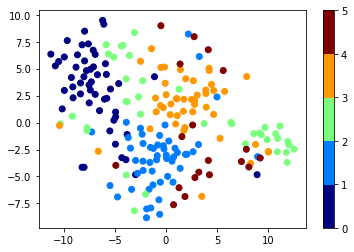

In [13]:
plot_tSNE(feat_matrix, labels)

## 2. Calculate features on the test data


This procedure is similar as for the training data, except that we do not know the labels and the folder with test images is not subdivided by material

In [21]:
def calculate_features_test(test_dir):
    
    # Initialize a dataframe for the features    
    columns = ['id', 'features']
    df_features = pd.DataFrame(columns=columns)

    # Walk through all images
    for root, dirs, files in os.walk(test_dir):
        for file in files:
            img_fp = join(root, file)
            id = file.split('.')[0]
            print("Calculate features for", id)

            # Pad if size is too small, preprocess
            img = image.load_img(img_fp, target_size=(224, 224))
            img_data = image.img_to_array(img)
            img_data = np.expand_dims(img_data, axis=0)
            img_data = preprocess_input(img_data)

            # Compute features 
            resnet50_feature = model.predict(img_data)
            resnet50_feature_np = np.array(resnet50_feature).flatten()

            df_features = df_features.append({'id': id ,
                                              'features': resnet50_feature_np},
                                             ignore_index=True)

    return df_features

In [22]:
features_test = calculate_features_test(test_dir)

Calculate features for 7a44e1d0
Calculate features for 7a44e4c8
Calculate features for 7a44e7b6
Calculate features for 7a44e96e
Calculate features for 7a44e9dc
Calculate features for 7a44ecde
Calculate features for 7a44f4c2
Calculate features for 7a44f5f8
Calculate features for 7a44f968
Calculate features for 7a44fbd4
Calculate features for 7a44fe4a
Calculate features for 7a4506b0
Calculate features for 7a450f8e
Calculate features for 7a4516aa
Calculate features for 7a4522ee
Calculate features for 7a452708
Calculate features for 7a45311c
Calculate features for 7a4545f8
Calculate features for 7a454de6
Calculate features for 7a455be2
Calculate features for 7a455f3e
Calculate features for 7a455fac
Calculate features for 7a456452
Calculate features for 7a4572a8
Calculate features for 7a45813a
Calculate features for 7a458c98
Calculate features for 7a4591ca
Calculate features for 7a459ce2
Calculate features for 7a459fee
Calculate features for 7a45a78c
Calculate features for 7a45a7fa
Calculat

C:\Users\Johannes\Miniconda3\envs\ipeo\lib\site-packages\PIL\Image.py:2731: DecompressionBombWarning: Image size (99907344 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


Calculate features for 7a4af85e
Calculate features for 7a4afa70
Calculate features for 7a4afe80
Calculate features for 7a4b063c
Calculate features for 7a4b0f38
Calculate features for 7a4b1226
Calculate features for 7a4b149c
Calculate features for 7a4b15d2
Calculate features for 7a4b2630
Calculate features for 7a4b2702
Calculate features for 7a4b2ab8
Calculate features for 7a4b3152
Calculate features for 7a4b35bc
Calculate features for 7a4b3e86
Calculate features for 7a4b4174
Calculate features for 7a4b46c4
Calculate features for 7a4b493a
Calculate features for 7a4b5448
Calculate features for 7a4b55ec
Calculate features for 7a4b56be
Calculate features for 7a4b61ea
Calculate features for 7a4b6bb8
Calculate features for 7a4b7bc6
Calculate features for 7a4b7cfc
Calculate features for 7a4b8396
Calculate features for 7a4b83fa
Calculate features for 7a4b89f4
Calculate features for 7a4b8c60
Calculate features for 7a4b9142
Calculate features for 7a4b976e
Calculate features for 7a4b9a48
Calculat

Calculate features for 7a503e4a
Calculate features for 7a504534
Calculate features for 7a504a20
Calculate features for 7a504ffc
Calculate features for 7a5055c4
Calculate features for 7a5056fa
Calculate features for 7a5058a8
Calculate features for 7a505f88
Calculate features for 7a5062c6
Calculate features for 7a50646a
Calculate features for 7a507e1e
Calculate features for 7a507e8c
Calculate features for 7a50815c
Calculate features for 7a509264
Calculate features for 7a50b47e
Calculate features for 7a50b6f4
Calculate features for 7a50c540
Calculate features for 7a50c748
Calculate features for 7a50d24c
Calculate features for 7a50e156
Calculate features for 7a50e980
Calculate features for 7a50f222
Calculate features for 7a50f510
Calculate features for 7a50f984
Calculate features for 7a50fa56
Calculate features for 7a50ff9c
Calculate features for 7a5112f2
Calculate features for 7a5115d6
Calculate features for 7a51224c
Calculate features for 7a513070
Calculate features for 7a5139c6
Calculat

In [23]:
features_test.head()

,id,features
0,7a44e1d0,"[6.2197113, 2.110661, 1.13708, 0.0, 0.0, 0.504..."
1,7a44e4c8,"[1.2535996, 0.0, 0.0, 0.15350294, 0.49344027, ..."
2,7a44e7b6,"[3.1035824, 3.8894126, 2.2028537, 0.0, 0.0, 2...."
3,7a44e96e,"[3.6370928, 4.50314, 2.9926593, 1.0457133, 1.0..."
4,7a44e9dc,"[0.5092753, 4.6801777, 1.3032107, 0.0, 0.0, 0...."


In [24]:
with open(join(pickle_path, 'resnet50_features_' + region + '_test.pkl' ), 'wb') as f:
    pickle.dump(features_test, f)